### What is time series forecasting / Analysis ?

- Analyse the series which help us to predict future value.

- Based on previous observed value, we need only 2 variables to predict future

- time and the variable which need to be predicted

### why and where time series is used ?

- Plan the future

- Business forecasting

- Understand the past behavior

- Evaluate current accomplishment


In [1]:
# Basic package
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
os.getcwd()

'C:\\Users\\SRADHA\\Desktop\\Projects\\Time Series Forecasting'

In [5]:
# import dataset
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
# YYYY-MM-DD format to predict passenger travelling month wise
# import package
from datetime import datetime

In [7]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [8]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
# set month as a index value 
dataset.set_index('Month', inplace = True)

In [10]:
dataset.head(10)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


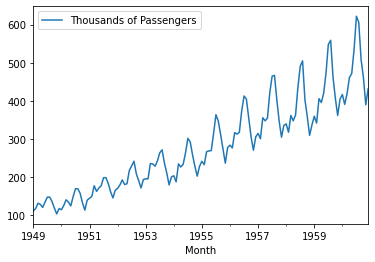

In [11]:
dataset.plot()
plt.show()

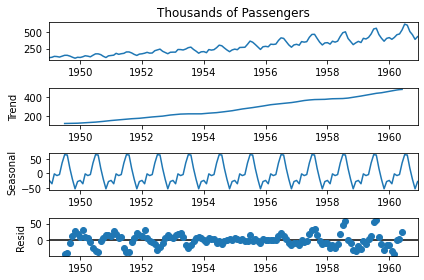

In [12]:
# Decomposition to check dataset component
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'], period = 12)
decomposition.plot()
plt.show()

In [13]:
# To check whether my data is stationary or non-stationary
# check name - "Augumented Dickey Fuller Test" - this is mandatory steps in ML model
from statsmodels.tsa.stattools import adfuller

In [14]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [15]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - Stationary or Non-Staionary")
    labels = ['ADF Test Statistics','p-value', '#Lags', 'No of Obs']
    
    for a, b in zip(result, labels):
        print(b + " : " + str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Weak evidence against null hypothesis and my timeseries is Non-Stationary")    

In [16]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : 0.8153688792060423
p-value : 0.9918802434376409
#Lags : 13
No of Obs : 130
Weak evidence against null hypothesis and my timeseries is Non-Stationary


In [17]:
# remember - you can build time series model only when your data is stationary
# we are getting non-stationary data so we have to make our data stationary first
# how we can do it - by the help of lag function

In [18]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [19]:
dataset.head(20)

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [20]:
adf_check(dataset['1st Diff'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : -2.8292668241699874
p-value : 0.05421329028382711
#Lags : 12
No of Obs : 130
Weak evidence against null hypothesis and my timeseries is Non-Stationary


In [21]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [22]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [23]:
adf_check(dataset['2nd Diff'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : -16.384231542468513
p-value : 2.7328918500142026e-29
#Lags : 11
No of Obs : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [24]:
# Now my time series data is stationary

# AIC = -2LL + 2K
# K = Parameter
# Parameter = trend (p d q) / seasonality (P D Q)

# D / d = difference - Integrated 

# Trend
# d = 2
# p = ?
# q = ?

# Seasonality 
# D = ?
# P = ?
# Q = ?

# ARIMA = AutoRegressive Integrated Moving Avg
# AR - P/p
# I - D/d
# MA - Q/q

In [25]:
dataset.head()

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [26]:
# create a seasonality
dataset['Seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [27]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [28]:
adf_check(dataset['Seasonality'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : -3.3830207264924805
p-value : 0.011551493085514982
#Lags : 1
No of Obs : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [29]:
# Trend
# d = 2
# p = ?
# q = ?

# Seasonality 
# D = 1
# P = ?
# Q = ?

# To calculate p,q and P, Q 
# how to find it  - by the help of acf and pacf method
# acf - autocorrelation
# pacf - partial autocorrelation

# ARIMA = AutoRegressive Integrated Moving Avg
# AR - P/p - pacf - partial autocorrelation
# I - D/d - got it (stationary)
# MA - Q/q - acf - autocorrelation

In [30]:
# To find P/p and Q/q value 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

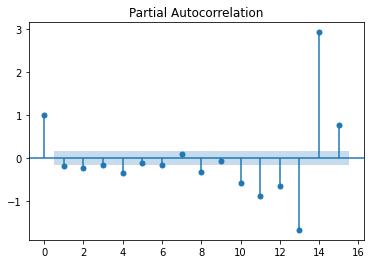

In [31]:
# Trend : d = 2, p = ? and q = ?
# to find p value
plot_pacf(dataset['2nd Diff'].dropna(), lags = 15)
plt.show()

In [32]:
# Trend : d = 2, p = 2 and q = ?

# correlation :
# 1) -0.2 to 0.2 - neutral / no correlation
# 2) -0.2 to -0.6 and 0.2 to 0.6 - weak correlation
# 3) -0.6 to -1 and 0.6 to 1 - strong correlation
# note : +ve sign means directly propotional and -ve sign means inversally propotional
# shadded part means no correlation
# the time we get no correlation, we stop checking then

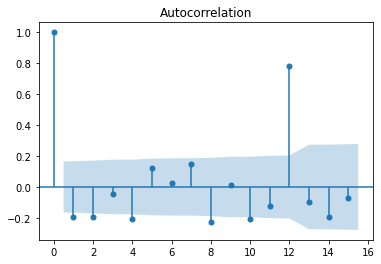

In [33]:
# to find  q value
plot_acf(dataset['2nd Diff'].dropna(), lags = 15)
plt.show()

In [34]:
# Trend : d = 2, p = 2 and q = 2

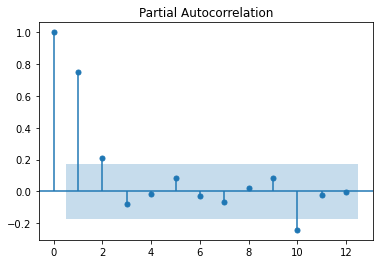

In [35]:
# Seasonality : D = 1, P = ? and Q = ?
# To find P value
plot_pacf(dataset['Seasonality'].dropna(), lags = 12)
plt.show()

In [36]:
# Seasonality : D = 1, P = 2 and Q = ?

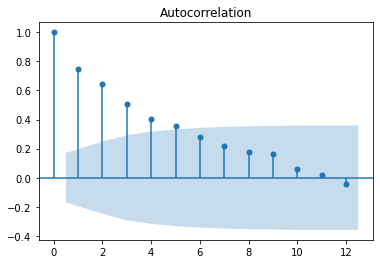

In [37]:
# To find Q value
plot_acf(dataset['Seasonality'].dropna(), lags = 12)
plt.show()

In [38]:
# Seasonality : D = 1, P = 2 and Q = 5

# Trend : d = 2, p = 2 and q = 2

In [39]:
# How many model we have in time series forcasting ?
# 1) Winters model / 1960 / single exponential smoothing - seasonality
# 2) Holt model / double exponential smoothing - trend
# 3) Holt winters model / multiple exponential smoothing - both (trend and seasonality)
# 4) AR model - AutoRegressive model
# 5) MA model - Moving Avg model
# 6) ARMA model - AutoRegressive Moving Avg
*****# 7) ARIMA model - AutoRegressive Integrated Moving Avg***** - 1977
# 8) ARIMAX model - ARIMA with external factors
*****# 9) SARIMA - seasonality with ARIMA *****
# 10) SARIMAX - SARIMA with external factors
# 11) VAR - Vector AutoRegressive
# 12) VARMA
# 13) VARIMA
# 14 and so on...........

SyntaxError: invalid syntax (Temp/ipykernel_5968/3246526619.py, line 8)

In [40]:
# Building Time Series Forecasting

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [41]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                 order = (2,2,2), seasonal_order=(2,1,5,12))

C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [42]:
result = model.fit()

C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
print(result.summary())

                                            SARIMAX Results                                             
Dep. Variable:                          Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -497.263
Date:                                          Tue, 30 Aug 2022   AIC                           1018.527
Time:                                                  08:57:45   BIC                           1052.937
Sample:                                              01-01-1949   HQIC                          1032.509
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [44]:
# AIC : 1018.526 , seasonality Q = 5 , seasonal_order=(2,1,5,12)
# AIC : 1016.717  , seasonality Q = 4 , seasonal_order=(2,1,4,12)
# AIC : 1015.007 , seasonality Q = 3 , seasonal_order=(2,1,3,12)
# AIC : 1014.108 , seasonality Q = 2 , seasonal_order=(2,1,2,12)
# AIC : 1012.200 , seasonality Q = 1 , seasonal_order=(2,1,1,12) ******

In [45]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                 order = (2,2,2), seasonal_order=(2,1,1,12))
result = model.fit()
print(result.summary())

C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -498.102
Date:                              Tue, 30 Aug 2022   AIC                           1012.204
Time:                                      08:57:52   BIC                           1035.144
Sample:                                  01-01-1949   HQIC                          1021.525
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3475      0.092    -14.673      0.000      -1.527      -1.167
ar.L2         -0.42

In [46]:
# AIC : 1012.200 , seasonality Q = 1 - This one is better

In [47]:
model1 = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                 order = (0,0,0), seasonal_order=(0,1,1,12))

result1 = model1.fit()

print(result1.summary())

C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                  SARIMAX Results                                  
Dep. Variable:     Thousands of Passengers   No. Observations:                  144
Model:              SARIMAX(0, 1, [1], 12)   Log Likelihood                -635.306
Date:                     Tue, 30 Aug 2022   AIC                           1274.613
Time:                             08:57:55   BIC                           1280.378
Sample:                         01-01-1949   HQIC                          1276.955
                              - 12-01-1960                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.5141      0.089      5.798      0.000       0.340       0.688
sigma2       862.7503    135.933      6.347      0.000     596.327    1129.173
Ljung-Box (L

In [48]:
# Auto ARIMA approach

import itertools

p = d = q = range(0,2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print("Few Parameter combinations are :")
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few Parameter combinations are :
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [49]:
# We are implemention the above parameter by using permutation and combination approach to get best AIC value

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                              order = param, 
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except :
            continue        



C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2044.4329486427587


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequenc

ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1887.355624655896
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1156.291490150854
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1118.6259190717344


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1107.2562043240036
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1109.2437994445115


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1033.6172166730355
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1846.078937757177


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1567.9916312319474
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1196.998361439989


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1072.1382984044342


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1071.0026810381928


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1049.5801417205844
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1059.5112223290455


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:985.3346478033052
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1405.0006612949667
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1194.7130010979658


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency in

ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1024.4816429833936
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:937.7995265380578


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1031.4838983661916
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1015.0000347579964


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:944.4876301158425


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:939.7984372654362
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1379.4417180072924


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1181.6309458759238
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1006.791904739727


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:920.6308317604712
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1014.2239031825106


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:985.1362335476033
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:934.7975425749117


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:920.3192974989164
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:1415.9068815931885


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1205.3907786172606
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:1029.9773091701022


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:944.3854921533066


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1017.3155493569673


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1007.0272556511665
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:944.0441660823766


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:945.440086687952
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:1390.4515018414986


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1192.29496316195
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:1014.2547824626149


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:929.4329707892183


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1009.5891017294664


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:989.1764736935394


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:935.816334821808


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:935.9152860556688
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1392.9437938537153
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1190.5342929076223
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1013.3680449838157


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency in

ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:928.1312837305468


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1007.649648640733


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:995.4636249453586
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:927.59043747103


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:928.1418620185431
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1377.292685893079

C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1185.3340359694453
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1008.552881348806


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:922.414896011623


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1009.1896100682968


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:987.1339264676931
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:929.5756208330479


C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SRADHA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:922.2053774352697


In [69]:
results

In [ ]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:922.205377435188
# ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:920.3192974989178 
# these are the best one 

In [48]:
# Prediction 

len(dataset)

144

In [49]:
dataset.head()

,Thousands of Passengers,Seasonality,1st Diff,2nd Diff
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,6.0,NaN
1949-03-01,132,NaN,14.0,8.0
1949-04-01,129,NaN,-3.0,-17.0
1949-05-01,121,NaN,-8.0,-5.0


<AxesSubplot:xlabel='Month'>

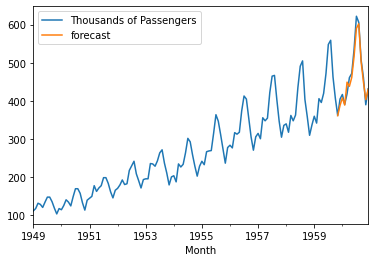

In [50]:
# validate whether my model is right or wrong

dataset['forecast'] = results.predict(start = 130, end = 144, dynamic = True)
dataset[['Thousands of Passengers', 'forecast']].plot()

In [51]:
dataset.tail()

,Thousands of Passengers,Seasonality,1st Diff,2nd Diff,forecast
Month,,,,,
1960-08-01,606,47.0,-16.0,-103.0,602.189421
1960-09-01,508,45.0,-98.0,-82.0,503.349383
1960-10-01,461,54.0,-47.0,51.0,449.827224
1960-11-01,390,28.0,-71.0,-24.0,403.527894
1960-12-01,432,27.0,42.0,113.0,430.234704


In [52]:
# my time series model is absolutely fine and we are ready to forecaset the passengers value

from pandas.tseries.offsets import DateOffset

In [55]:
future_dates = [dataset.index[-1] + DateOffset(months=x) for x in range(0,61) ]

In [56]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [57]:
future_dates_df = pd.DataFrame(index =future_dates[1:], columns = dataset.columns )

In [58]:
future_dates_df.head()

,Thousands of Passengers,Seasonality,1st Diff,2nd Diff,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN


In [59]:
future_dates_df.tail()

,Thousands of Passengers,Seasonality,1st Diff,2nd Diff,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [60]:
future_df = pd.concat([dataset, future_dates_df])

In [61]:
future_df.head()

,Thousands of Passengers,Seasonality,1st Diff,2nd Diff,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,6.0,NaN,NaN
1949-03-01,132,NaN,14.0,8.0,NaN
1949-04-01,129,NaN,-3.0,-17.0,NaN
1949-05-01,121,NaN,-8.0,-5.0,NaN


In [62]:
future_df.tail()

,Thousands of Passengers,Seasonality,1st Diff,2nd Diff,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

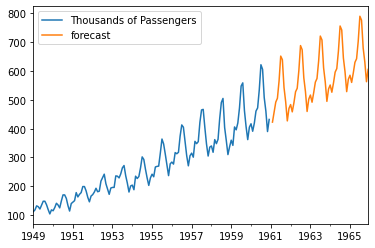

In [66]:
future_df['forecast'] = results.predict(start=145, end = 203, dynamic = True)
future_df[['Thousands of Passengers', 'forecast']].plot()

In [67]:
future_df.tail(50)

,Thousands of Passengers,Seasonality,1st Diff,2nd Diff,forecast
1961-11-01,NaN,NaN,NaN,NaN,426.938001
1961-12-01,NaN,NaN,NaN,NaN,470.135609
1962-01-01,NaN,NaN,NaN,NaN,483.700432
1962-02-01,NaN,NaN,NaN,NaN,458.363243
1962-03-01,NaN,NaN,NaN,NaN,489.531496
1962-04-01,NaN,NaN,NaN,NaN,528.160092
1962-05-01,NaN,NaN,NaN,NaN,540.198141
1962-06-01,NaN,NaN,NaN,NaN,601.885317
1962-07-01,NaN,NaN,NaN,NaN,688.574175
1962-08-01,NaN,NaN,NaN,NaN,674.230265


In [68]:
# This is all about for Airline passengers

# Time Series problem will be solved by - lSTM ******